In [13]:
import pandas as pd
df=pd.read_csv("movies.csv")
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [2]:
df.shape


(9742, 3)

In [8]:
import pandas as pd
ratings_df=pd.read_csv("ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
ratings_df.shape

(100836, 4)

In [10]:
ratings_df['userId'].nunique()

610

In [15]:
# Group by movie and count the number of ratings
movie_ratings_count = ratings_df.groupby('movieId')['userId'].count().reset_index(name='ratings_count')

# Find the movieId with the maximum number of ratings
max_ratings_movie_id = movie_ratings_count.loc[movie_ratings_count['ratings_count'].idxmax(), 'movieId']

# Find the movie title for the movieId with the maximum ratings
max_ratings_movie_title =df.loc[df['movieId'] == max_ratings_movie_id,'title'].values[0]

# Display the result
print("Movie with the maximum number of user ratings:")
print(f"MovieId: {max_ratings_movie_id}")
print(f"Movie Title: {max_ratings_movie_title}")

Movie with the maximum number of user ratings:
MovieId: 356
Movie Title: Forrest Gump (1994)


In [17]:
df1=pd.read_csv("tags.csv")
df1.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [18]:
df1.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [21]:

# Filter tags for the "Matrix, The (1999)" movie (replace 'Matrix, The (1999)' with the actual movie title)
matrix_tags = df1[(df1['movieId'] == 2571) & (df1['tag'].notna())]['tag'].unique()

# Display the result
print("Tags submitted by users for 'Matrix, The (1999)':")
print(matrix_tags)


Tags submitted by users for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [23]:
# Specify the movieId for "Terminator 2: Judgment Day (1991)"
terminator2_movie_id =589  # Replace with the actual movieId

# Filter ratings for the specific movieId
terminator2_ratings = ratings_df[ratings_df['movieId'] == terminator2_movie_id]

# Calculate the average rating
average_rating = terminator2_ratings['rating'].mean()

# Display the result
print("Average user rating for 'Terminator 2: Judgment Day (1991)':")
print(average_rating)

Average user rating for 'Terminator 2: Judgment Day (1991)':
3.970982142857143


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

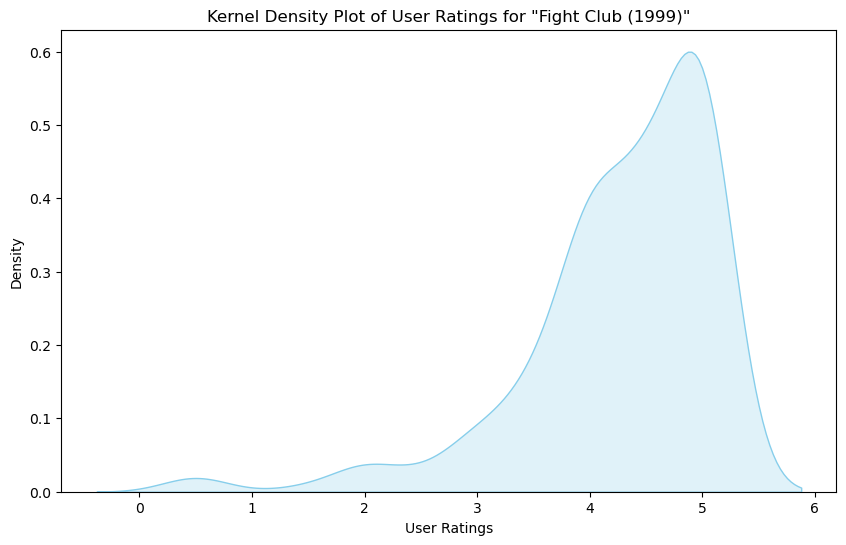

In [25]:
fight_club_movie_id = 2959  # Replace with the actual movieId

# Filter ratings for the specific movieId
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

# Plot the kernel density plot for user ratings
plt.figure(figsize=(10, 6))
sns.kdeplot(fight_club_ratings['rating'], fill=True, color='skyblue')
plt.title('Kernel Density Plot of User Ratings for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Density')
plt.show()

In [26]:
ratings_grouped = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Display the result
print("User ratings grouped by movieId:")
print(ratings_grouped.head())

User ratings grouped by movieId:
   movieId  count      mean
0        1    215  3.920930
1        2    110  3.431818
2        3     52  3.259615
3        4      7  2.357143
4        5     49  3.071429


In [27]:
result_df = pd.merge(df, ratings_grouped, on='movieId', how='inner')

# Display the result
print("Resulting DataFrame after inner join:")
print(result_df.head())

Resulting DataFrame after inner join:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
3                         Comedy|Drama|Romance      7  2.357143  
4                                       Comedy     49  3.071429  


In [28]:
result_df_filtered = result_df[result_df['count'] > 50]

# Display the result
print("Filtered DataFrame with movies having more than 50 user ratings:")
print(result_df_filtered.head())

Filtered DataFrame with movies having more than 50 user ratings:
   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
5                        Action|Crime|Thriller    102  3.946078  
6                               Comedy|Romance     54  3.185185  


In [29]:
result_df_sorted = result_df_filtered.sort_values(by='mean', ascending=False)

# Display the most popular movie based on average user ratings
most_popular_movie = result_df_sorted.iloc[0]

print("Most popular movie based on average user ratings:")
print(most_popular_movie[['title', 'mean']])

Most popular movie based on average user ratings:
title    Shawshank Redemption, The (1994)
mean                             4.429022
Name: 277, dtype: object


In [30]:
top5_popular_movies = result_df_filtered.sort_values(by='count', ascending=False).head(5)

# Display the top 5 popular movies based on the number of user ratings
print("Top 5 popular movies based on the number of user ratings:")
print(top5_popular_movies[['title', 'count']])

Top 5 popular movies based on the number of user ratings:
                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


In [31]:
# Assuming result_df_filtered is the DataFrame with movies having more than 50 user ratings
# You may need to adjust the column names based on your actual DataFrame structure

# Filter for Sci-Fi movies
scifi_movies = result_df_filtered[result_df_filtered['genres'].str.contains('Sci-Fi')]

# Sort the Sci-Fi movies based on the number of user ratings in descending order
scifi_top_movies = scifi_movies.sort_values(by='count', ascending=False)

# Display the third most popular Sci-Fi movie based on the number of user ratings
third_most_popular_scifi_movie = scifi_top_movies.iloc[2]

print("Third most popular Sci-Fi movie based on the number of user ratings:")
print(third_most_popular_scifi_movie[['title', 'count']])

Third most popular Sci-Fi movie based on the number of user ratings:
title    Jurassic Park (1993)
count                     238
Name: 418, dtype: object


In [40]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Load "links.csv" file
links_df = pd.read_csv('links.csv')

links_df.head()



,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [41]:
links_df.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [45]:
links_df = pd.read_csv('links.csv')

# Merge based on 'movieId'
merged_df = pd.merge(df, links_df, on='movieId', how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())

Merged DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  imdbId   tmdbId  
0  Adventure|Animation|Children|Comedy|Fantasy  114709    862.0  
1                   Adventure|Children|Fantasy  113497   8844.0  
2                               Comedy|Romance  113228  15602.0  
3                         Comedy|Drama|Romance  114885  31357.0  
4                                       Comedy  113041  11862.0  


In [48]:

# Merge 'result_df' with 'merged_df' based on a common column (e.g., 'movieId')
final_merged_df = pd.merge(result_df, merged_df, on='movieId', how='inner')

# Display the final merged DataFrame
print("Final Merged DataFrame:")
print(final_merged_df.head())


Final Merged DataFrame:
   movieId                             title_x  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                      genres_x  count      mean  \
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930   
1                   Adventure|Children|Fantasy    110  3.431818   
2                               Comedy|Romance     52  3.259615   
3                         Comedy|Drama|Romance      7  2.357143   
4                                       Comedy     49  3.071429   

                              title_y  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                         

In [49]:
# Filter movies with more than 50 user ratings
filtered_df =final_merged_df[final_merged_df['count'] > 50]

# Display the filtered DataFrame
print("Filtered DataFrame with movies having more than 50 user ratings:")
print(filtered_df.head())

Filtered DataFrame with movies having more than 50 user ratings:
   movieId                  title_x  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                      genres_x  count      mean  \
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930   
1                   Adventure|Children|Fantasy    110  3.431818   
2                               Comedy|Romance     52  3.259615   
5                        Action|Crime|Thriller    102  3.946078   
6                               Comedy|Romance     54  3.185185   

                   title_y                                     genres_y  \
0         Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1           Jumanji (1995)                   Adventure|Children|Fantasy   
2  Grumpier Old Men (1995)                               Comedy|Romance 

In [52]:
filtered_df.columns

Index(['movieId', 'title_x', 'genres_x', 'count', 'mean', 'title_y',
       'genres_y', 'imdbId', 'tmdbId'],
      dtype='object')

In [50]:
highest_rated_movie = filtered_df.loc[filtered_df['mean'].idxmax()]

# Display the movieId of the movie with the highest IMDb rating
print("MovieId of the movie with the highest IMDb rating:")
print(highest_rated_movie['movieId'])

MovieId of the movie with the highest IMDb rating:
318


In [53]:
scifi_movies = filtered_df[filtered_df['genres_x'].str.contains('Sci-Fi')]

# Find the Sci-Fi movie with the highest IMDb rating
highest_rated_scifi_movie = scifi_movies.loc[scifi_movies['mean'].idxmax()]

# Display the movieId of the Sci-Fi movie with the highest IMDb rating
print("MovieId of the Sci-Fi movie with the highest IMDb rating:")
print(highest_rated_scifi_movie['movieId'])


MovieId of the Sci-Fi movie with the highest IMDb rating:
260
